In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('train_10train.csv')

In [3]:
df.head(50)

,Unnamed: 0,Unnamed: 0.1,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hood_pick,drop_hood,boro_pick,boro_drop
0,0,0,2009-09-26 10:00:00.00000061,17.3,2009-09-26 10:00:00 UTC,-73.992270,40.694707,-73.978580,40.753823,6,Brooklyn Heights,Midtown,Brooklyn,Manhattan
1,1,1,2013-05-30 23:19:00.000000198,7.0,2013-05-30 23:19:00 UTC,-73.974095,40.783962,-73.951655,40.771982,5,Upper West Side,Upper East Side,Manhattan,Manhattan
2,2,2,2009-04-12 18:57:00.000000121,4.1,2009-04-12 18:57:00 UTC,-73.987312,40.768525,-73.989643,40.762507,1,Hell's Kitchen,Hell's Kitchen,Manhattan,Manhattan
3,3,3,2012-03-28 12:05:00.00000034,8.9,2012-03-28 12:05:00 UTC,-74.005063,40.748015,-74.004713,40.725563,4,Chelsea,SoHo,Manhattan,Manhattan
4,4,4,2013-06-22 23:27:47.0000002,9.5,2013-06-22 23:27:47 UTC,-73.978311,40.745573,-73.989952,40.733327,3,Kips Bay,East Village,Manhattan,Manhattan
5,5,5,2011-06-13 18:40:00.000000169,8.5,2011-06-13 18:40:00 UTC,-73.982260,40.757050,-73.982902,40.742082,1,Midtown,Midtown,Manhattan,Manhattan
6,6,6,2012-10-21 10:09:07.0000001,79.5,2012-10-21 10:09:07 UTC,-73.986463,40.758596,-74.177176,40.694829,1,Theater District,rip,Manhattan,rip
7,7,7,2013-07-25 13:09:42.0000001,12.5,2013-07-25 13:09:42 UTC,-73.983957,40.767091,-73.977486,40.753346,1,Hell's Kitchen,Midtown,Manhattan,Manhattan
8,8,8,2013-11-16 13:36:00.00000049,17.5,2013-11-16 13:36:00 UTC,-73.983007,40.751532,-74.014047,40.702537,1,Midtown,Financial District,Manhattan,Manhattan
9,9,9,2011-05-19 17:50:55.0000001,10.1,2011-05-19 17:50:55 UTC,-73.951814,40.773871,-73.973881,40.760048,1,Upper East Side,Midtown,Manhattan,Manhattan


In [4]:
%timeit df["pickup_datetime"] = pd.to_datetime(df['pickup_datetime'],infer_datetime_format=True)

953 µs ± 454 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
df["day_of_week"] = df.pickup_datetime.dt.dayofweek
df["month"] = df.pickup_datetime.dt.month
df["month_name"] = df.pickup_datetime.dt.month_name()
df["hour"] = df.pickup_datetime.dt.hour


In [6]:
df["year"] = df.pickup_datetime.dt.year

In [7]:
df["dayname"] = df.pickup_datetime.dt.day_name()


In [8]:
df['times'] = ['day' if (x >= 5 and x <= 11) else 'afternoon' if (x > 11 and x <=17) else 'evening' if (x > 17 and x < 22) else 'night' if (x >= 22) else 'night' if (x >= 0 and x < 5) else 'error' for x in df['hour']] 

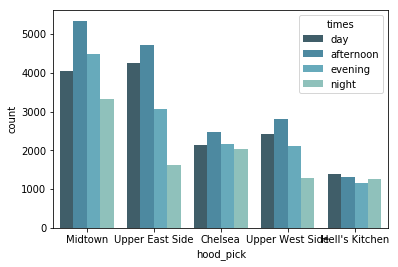

In [10]:
sns.countplot("hood_pick", data=df,hue='times',hue_order=["day","afternoon","evening","night"],palette  = "GnBu_d",order = pd.value_counts(df['hood_pick']).iloc[:5].index)


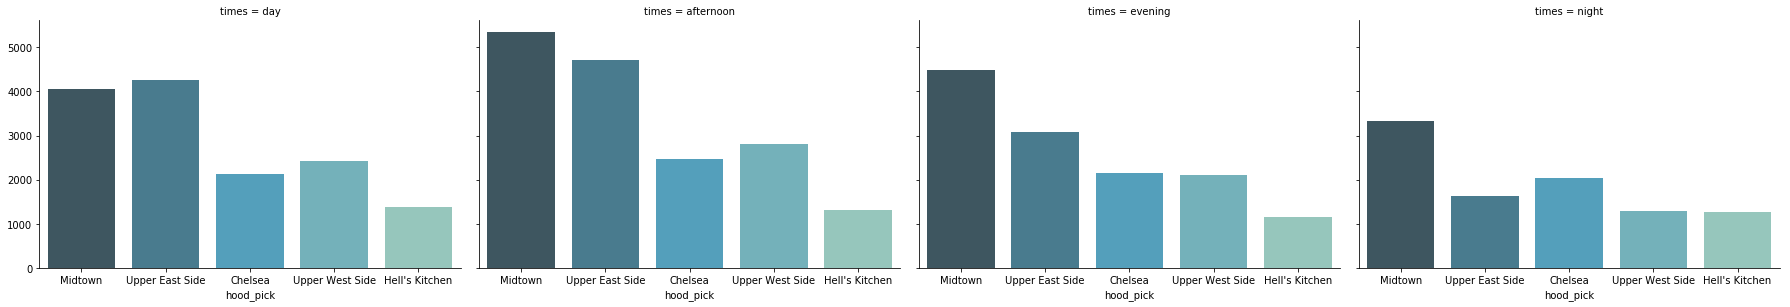

In [11]:
g=sns.FacetGrid(data=df,col='times',col_order=["day","afternoon","evening","night"],aspect=2)
g.map(sns.countplot,"hood_pick",palette  = "GnBu_d",order = pd.value_counts(df['hood_pick']).iloc[:5].index)
plt.gcf().set_size_inches(25, 5)

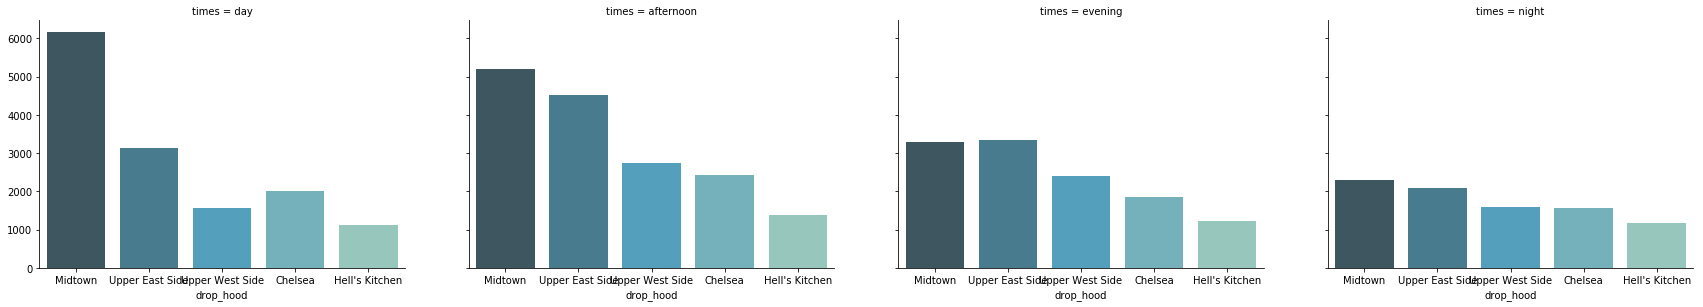

In [12]:
g=sns.FacetGrid(data=df,col='times',col_order=["day","afternoon","evening","night"])
g.map(sns.countplot,"drop_hood",palette  = "GnBu_d",order = pd.value_counts(df['drop_hood']).iloc[:5].index)
plt.gcf().set_size_inches(25, 5)

In [13]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hood_pick', 'drop_hood',
       'boro_pick', 'boro_drop', 'day_of_week', 'month', 'month_name', 'hour',
       'year', 'dayname', 'times'],
      dtype='object')

In [14]:
df.groupby("times", as_index=True)[['hood_pick','boro_pick', 'drop_hood', 'boro_drop']].agg(lambda x: scipy.stats.mode(x))

/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,hood_pick,boro_pick,drop_hood,boro_drop
times,,,,
afternoon,"([Midtown], [5344])","([Manhattan], [26222])","([Midtown], [5206])","([Manhattan], [25880])"
day,"([Upper East Side], [4266])","([Manhattan], [22798])","([Midtown], [6160])","([Manhattan], [22346])"
evening,"([Midtown], [4486])","([Manhattan], [21722])","([Upper East Side], [3355])","([Manhattan], [21240])"
night,"([Midtown], [3334])","([Manhattan], [19831])","([Midtown], [2307])","([Manhattan], [17664])"


In [15]:
df.groupby("hour", as_index=True)[['hood_pick','boro_pick', 'drop_hood', 'boro_drop']].agg(lambda x: scipy.stats.mode(x))

,hood_pick,boro_pick,drop_hood,boro_drop
hour,,,,
0,"([Midtown], [555])","([Manhattan], [3448])","([Midtown], [397])","([Manhattan], [3078])"
1,"([Midtown], [389])","([Manhattan], [2590])","([Midtown], [257])","([Manhattan], [2248])"
2,"([Midtown], [260])","([Manhattan], [1929])","([Upper East Side], [169])","([Manhattan], [1626])"
3,"([Midtown], [190])","([Manhattan], [1441])","([Midtown], [130])","([Manhattan], [1178])"
4,"([Midtown], [139])","([Manhattan], [1063])","([Midtown], [87])","([Manhattan], [800])"
5,"([Upper East Side], [126])","([Manhattan], [835])","([Midtown], [135])","([Manhattan], [654])"
6,"([Upper East Side], [312])","([Manhattan], [1831])","([Midtown], [524])","([Manhattan], [1701])"
7,"([Upper East Side], [673])","([Manhattan], [3175])","([Midtown], [1014])","([Manhattan], [3138])"
8,"([Upper East Side], [856])","([Manhattan], [4122])","([Midtown], [1265])","([Manhattan], [4129])"


In [16]:
df.groupby("times", as_index=True)['hood_pick','drop_hood'].apply(lambda x: (x =="LaGuardia Airport").sum())


,hood_pick,drop_hood
times,,
afternoon,696,513
day,378,567
evening,529,85
night,317,66


In [17]:
df.groupby("times", as_index=True)['hood_pick','drop_hood'].apply(lambda x: (x =='John F. Kennedy International Airport').sum())

,hood_pick,drop_hood
times,,
afternoon,522,359
day,305,271
evening,393,92
night,275,46


In [18]:
df.groupby("times", as_index=True)['hood_pick','drop_hood'].apply(lambda x: (x =="SoHo").sum())

,hood_pick,drop_hood
times,,
afternoon,705,657
day,414,525
evening,589,480
night,627,422


In [21]:
df[df.drop_hood == "LaGuardia Airport"].iloc[0:50, 10:14].apply(lambda x: scipy.stats.mode(x))

hood_pick              ([Midtown], [10])
drop_hood    ([LaGuardia Airport], [50])
boro_pick            ([Manhattan], [44])
boro_drop               ([Queens], [50])
dtype: object

In [22]:
df[df.drop_hood == "John F. Kennedy International Airport"].iloc[0:50, 10:14].apply(lambda x: scipy.stats.mode(x))

hood_pick                           ([Upper East Side], [8])
drop_hood    ([John F. Kennedy International Airport], [50])
boro_pick                                ([Manhattan], [38])
boro_drop                                   ([Queens], [50])
dtype: object

In [28]:
df.iloc[:, 10:14].apply(lambda x: (x =="LaGuardia Airport").sum())

hood_pick    1920
drop_hood    1231
boro_pick       0
boro_drop       0
dtype: int64

In [32]:
df.iloc[0:, 10:14].apply(lambda x: (x =="John F. Kennedy International Airport").sum())

hood_pick    1495
drop_hood     768
boro_pick       0
boro_drop       0
dtype: int64

In [34]:
df.groupby("year", as_index=True)[['hood_pick','boro_pick', 'drop_hood', 'boro_drop']].agg(lambda x: scipy.stats.mode(x))

,hood_pick,boro_pick,drop_hood,boro_drop
year,,,,
2009,"([Midtown], [2726])","([Manhattan], [14283])","([Midtown], [2708])","([Manhattan], [13737])"
2010,"([Midtown], [2580])","([Manhattan], [13647])","([Midtown], [2565])","([Manhattan], [13141])"
2011,"([Midtown], [2774])","([Manhattan], [14238])","([Midtown], [2694])","([Manhattan], [13750])"
2012,"([Midtown], [2793])","([Manhattan], [14424])","([Midtown], [2650])","([Manhattan], [13904])"
2013,"([Midtown], [2634])","([Manhattan], [14221])","([Midtown], [2680])","([Manhattan], [13674])"
2014,"([Midtown], [2577])","([Manhattan], [13413])","([Midtown], [2477])","([Manhattan], [12853])"
2015,"([Midtown], [1125])","([Manhattan], [6347])","([Midtown], [1181])","([Manhattan], [6071])"


In [48]:
listA = list(pd.value_counts(df['hood_pick']).iloc[0:9].index)
listA

['Midtown',
 'Upper East Side',
 'Chelsea',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Theater District',
 'West Village',
 'Murray Hill']

In [49]:
df[df.hood_pick.isin(listA)].pivot_table(index='times',columns='hood_pick',values='key',aggfunc='count')

hood_pick,Chelsea,East Village,Hell's Kitchen,Midtown,Murray Hill,Theater District,Upper East Side,Upper West Side,West Village
times,,,,,,,,,
afternoon,2474,814,1313,5344,767,1022,4709,2809,772
day,2133,738,1386,4045,797,923,4266,2432,795
evening,2160,902,1160,4486,627,950,3077,2105,869
night,2034,1676,1271,3334,432,917,1629,1296,1334


### Percentage share of pickup borough

In [55]:
df[df.boro_pick.isin(["Bronx","Brooklyn","Manhattan","Queens"])].pivot_table(index='times',columns='boro_pick',values='key',aggfunc=len,margins=True).div(len(df.index)).mul(100).round(decimals=2)

boro_pick,Bronx,Brooklyn,Manhattan,Queens,All
times,,,,,
afternoon,0.02,0.33,26.22,1.54,28.11
day,0.02,0.40,22.80,1.13,24.34
evening,0.01,0.44,21.72,1.13,23.30
night,0.02,1.03,19.83,0.98,21.87
All,0.07,2.19,90.57,4.79,97.62


In [67]:

pd.value_counts(df['hood_pick'])

Midtown                                  17209
Upper East Side                          13681
Chelsea                                   8801
Upper West Side                           8642
Hell's Kitchen                            5130
East Village                              4130
Theater District                          3812
West Village                              3770
Murray Hill                               2623
rip                                       2370
SoHo                                      2335
Greenwich Village                         2283
Gramercy                                  2202
Kips Bay                                  2173
LaGuardia Airport                         1920
Tribeca                                   1786
Financial District                        1748
Lower East Side                           1614
Flatiron District                         1598
John F. Kennedy International Airport     1495
Central Park                              1415
East Harlem  

### Percentage share of pickup neighbourhood

In [62]:
pd.value_counts(df['hood_pick']).apply(lambda x: x>1)

Midtown                                   True
Upper East Side                           True
Chelsea                                   True
Upper West Side                           True
Hell's Kitchen                            True
East Village                              True
Theater District                          True
West Village                              True
Murray Hill                               True
rip                                       True
SoHo                                      True
Greenwich Village                         True
Gramercy                                  True
Kips Bay                                  True
LaGuardia Airport                         True
Tribeca                                   True
Financial District                        True
Lower East Side                           True
Flatiron District                         True
John F. Kennedy International Airport     True
Central Park                              True
East Harlem  

In [68]:
df[df.hood_pick.isin(listA)].pivot_table(index='times',columns='hood_pick',values='key',aggfunc=len,margins=True).div(len(df.index)).mul(100).round(decimals=2)

hood_pick,Chelsea,East Village,Hell's Kitchen,Midtown,Murray Hill,Theater District,Upper East Side,Upper West Side,West Village,All
times,,,,,,,,,,
afternoon,2.47,0.81,1.31,5.34,0.77,1.02,4.71,2.81,0.77,20.02
day,2.13,0.74,1.39,4.04,0.80,0.92,4.27,2.43,0.80,17.52
evening,2.16,0.90,1.16,4.49,0.63,0.95,3.08,2.10,0.87,16.34
night,2.03,1.68,1.27,3.33,0.43,0.92,1.63,1.30,1.33,13.92
All,8.80,4.13,5.13,17.21,2.62,3.81,13.68,8.64,3.77,67.80


In [246]:
listA

['Midtown',
 'Upper East Side',
 'Upper West Side',
 'Chelsea',
 "Hell's Kitchen",
 'East Village',
 'Theater District',
 'West Village',
 'Murray Hill']

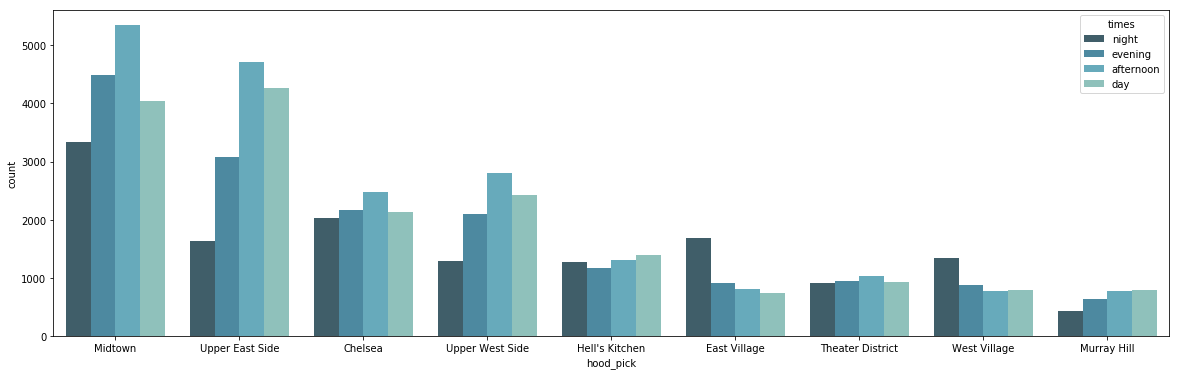

In [69]:
plt.figure(figsize=(20,6))
sns.countplot(x="hood_pick",order=(listA),hue='times',data=df[df.hood_pick.isin(listA)],palette  = "GnBu_d")

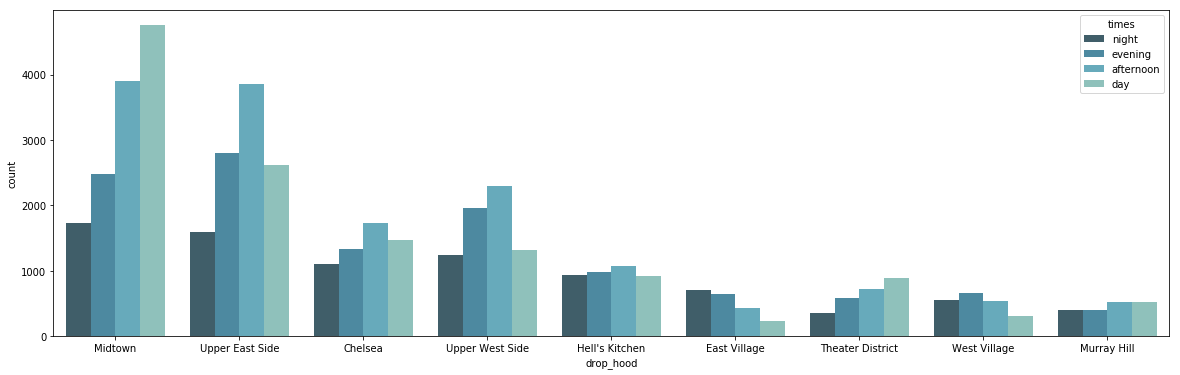

In [71]:
plt.figure(figsize=(20,6))
sns.countplot(x="drop_hood",order=(listA),hue='times',data=df[df.hood_pick.isin(listA)],palette  = "GnBu_d")

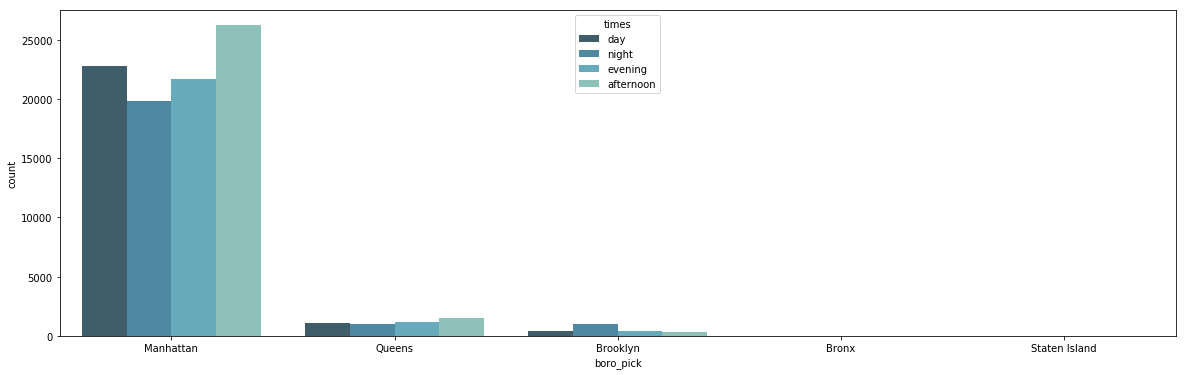

In [78]:
plt.figure(figsize=(20,6))
sns.countplot(x="boro_pick",order=(listB),hue='times',data=df[df.boro_pick.isin(listB)],palette  = "GnBu_d")

In [74]:
list(df.boro_drop.unique())

['Manhattan', 'rip', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']

In [75]:
listB = ['Manhattan','Queens', 'Brooklyn', 'Bronx', 'Staten Island']


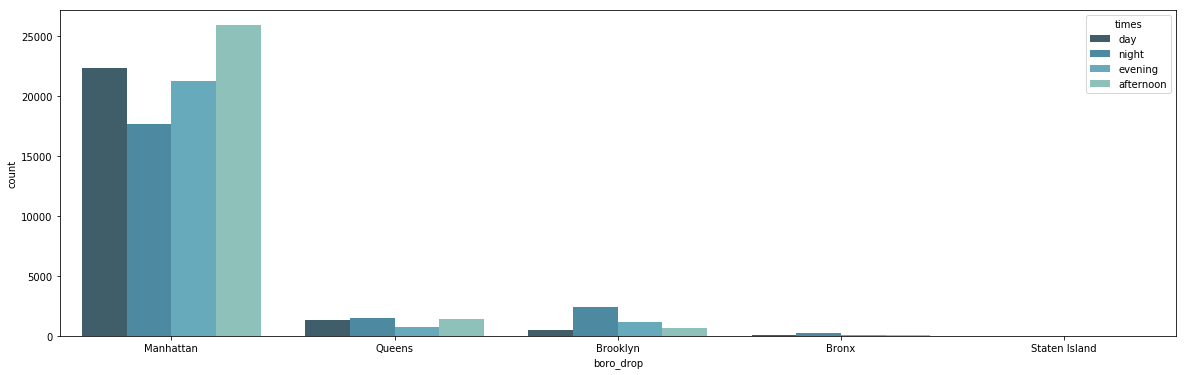

In [77]:
plt.figure(figsize=(20,6))
sns.countplot(x="boro_drop",order=(listB),hue='times',data=df[df.boro_drop.isin(listB)],palette  = "GnBu_d")

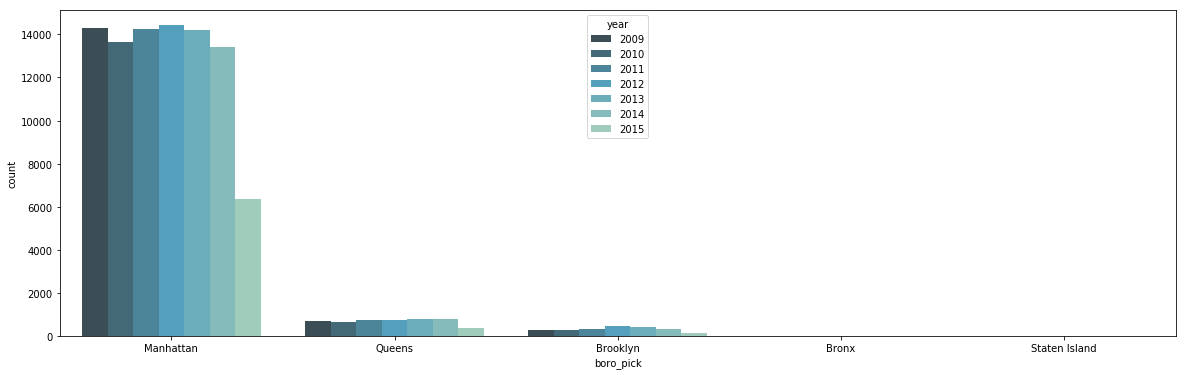

In [79]:
plt.figure(figsize=(20,6))
sns.countplot(x="boro_pick",order=(listB),hue='year',data=df[df.boro_pick.isin(listB)],palette  = "GnBu_d")

Where can we go from here?
 * We can extend the data to include weather data to see if number of rides every hour is correlated with the weather data.
 * We could also acquire data for major events going on every neighbourhood across time.